# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

## Чтение файла

In [2]:
df = pd.read_csv("../data/checker_regression.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    59 non-null     float64
 3   AVG(diff)    18 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [3]:
df.isna().sum()

uid             0
num_commits     0
pageviews      18
AVG(diff)      59
dtype: int64

## Заполнение пропусков нулями

In [4]:
df = df.fillna(0)
df.isna().sum()

uid            0
num_commits    0
pageviews      0
AVG(diff)      0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True, ignore_index=True) 
df.drop(columns='uid', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 828.0 bytes


## Разделяем на признаки и цель

In [6]:
X = df.drop("AVG(diff)", axis=1)  # признаки: uid, num_commits, pageviews
y = df["AVG(diff)"]               # целевая переменная

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)

print(f"Размер train: {X_train.shape}, размер test: {X_test.shape}")

Размер train: (23, 2), размер test: (6, 2)


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [8]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    
    scores = []
    scores_test = []
    
    for train_idx, test_idx in kf.split(X):
        
        if hasattr(X, "iloc"):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        else: 
            X_train, X_test = X[train_idx], X[test_idx]
        
        if hasattr(y, "iloc"):
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        else:
            y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)
        
        scores.append(rmse_train)
        scores_test.append(rmse_test)
    
    for i in range(len(scores)):
        print(f"train - {scores[i]}   |   test - {scores_test[i]}")
    
    print(f"Average RMSE on crossval is {np.mean(scores_test)}")

## Пример использования

In [9]:
crossval(10, X_train, y_train, LinearRegression())

train - 53.33351096491692   |   test - 115.2394318363867
train - 62.409919772255556   |   test - 69.35808794733022
train - 64.75146423244131   |   test - 52.395419621714424
train - 64.04094981627755   |   test - 78.18810821407222
train - 63.574089717062186   |   test - 58.669554693832154
train - 65.40154560181439   |   test - 32.10068854674121
train - 64.40600245557161   |   test - 48.59322878192214
train - 61.215472663804725   |   test - 82.41734194163652
train - 64.69372263304507   |   test - 43.81163345544473
train - 62.80195740062014   |   test - 70.47228900535454
Average RMSE on crossval is 65.1245784044435


In [10]:
crossval(10, X_train, y_train, DecisionTreeRegressor(max_depth=5, random_state=21))

train - 2.4902936573825984   |   test - 43.200154320712016
train - 18.528581525128505   |   test - 77.38312094641445
train - 15.42920121069137   |   test - 9.093266739736606
train - 15.252222710773916   |   test - 8.60313250443633
train - 3.070947882897217   |   test - 80.25661966467314
train - 15.252222710773916   |   test - 15.202795795510772
train - 8.516751700255769   |   test - 40.58792924010783
train - 15.252222710773916   |   test - 37.190388543278225
train - 15.057358587051302   |   test - 50.4874241767195
train - 2.4302777619029476   |   test - 57.982756057296896
Average RMSE on crossval is 41.99875879888857


In [11]:
crossval(10, X_train, y_train, RandomForestRegressor(n_estimators=100, max_depth=10, random_state=21))

train - 19.85306588532919   |   test - 76.53685427174808
train - 22.671373358544045   |   test - 81.61793883314117
train - 21.694829255044976   |   test - 5.71235319286195
train - 22.7272784086383   |   test - 9.177142450433891
train - 24.38477655695876   |   test - 70.14702143355767
train - 19.90791216218836   |   test - 40.07320878716852
train - 20.52570355431141   |   test - 55.68347292110613
train - 22.325869971584417   |   test - 22.92156316416678
train - 18.972031532693418   |   test - 26.447489505149523
train - 16.687043596636038   |   test - 69.28195592288081
Average RMSE on crossval is 45.759900048221446


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

## Обучаем модели

In [12]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=5, random_state=21)
rf = RandomForestRegressor(n_estimators=100, random_state=21)

In [13]:
models = {
    "LinearRegression": lr,
    "DecisionTreeRegressor": dt,
    "RandomForestRegressor": rf
}

In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)

## Рисуем графики сравнения предсказаний и фактических значений

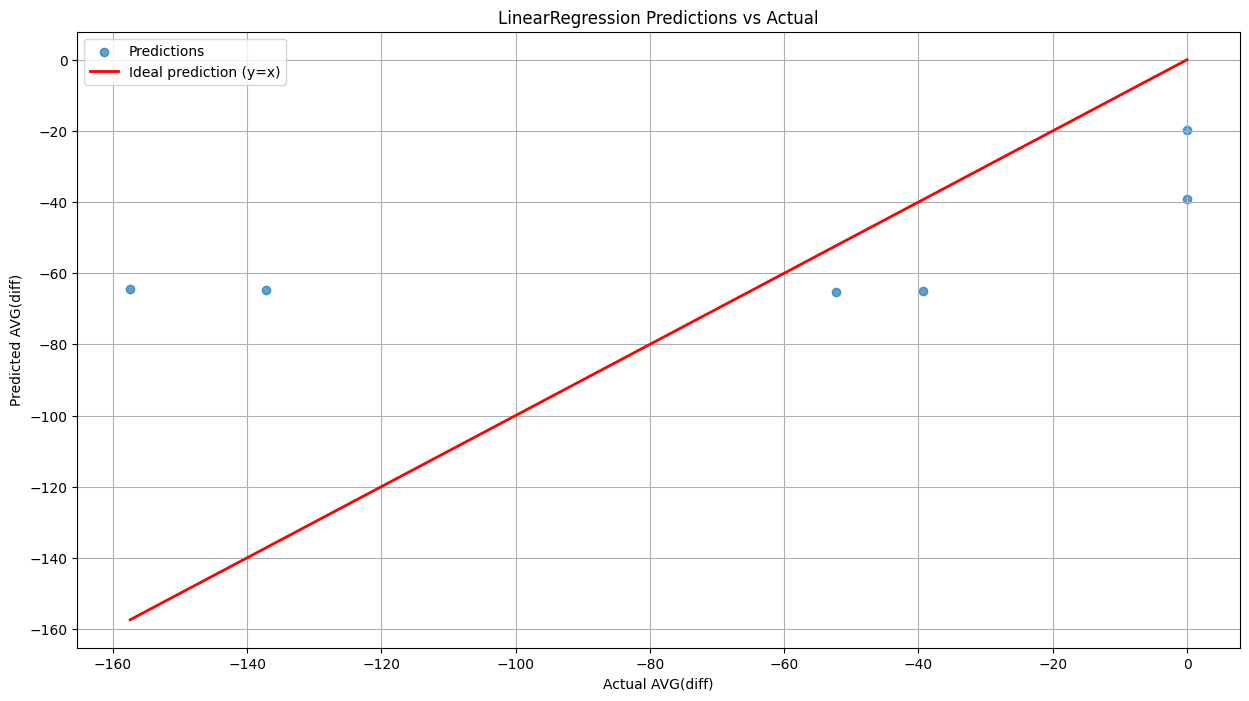

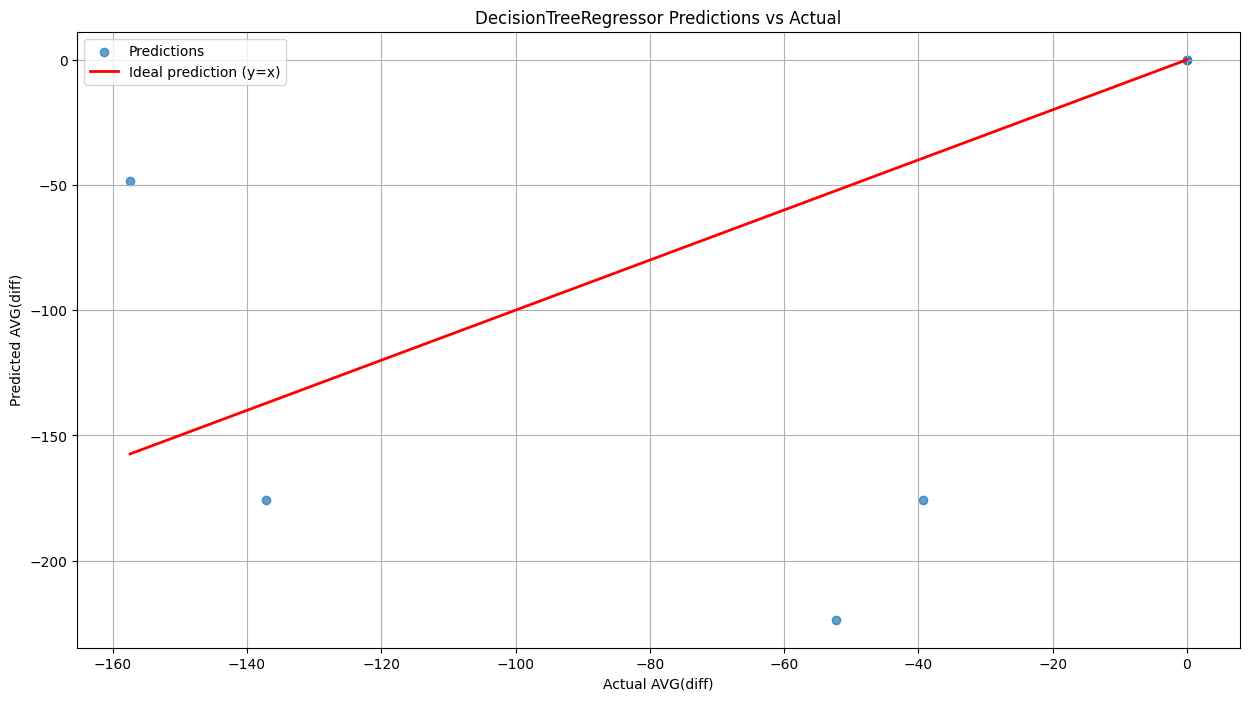

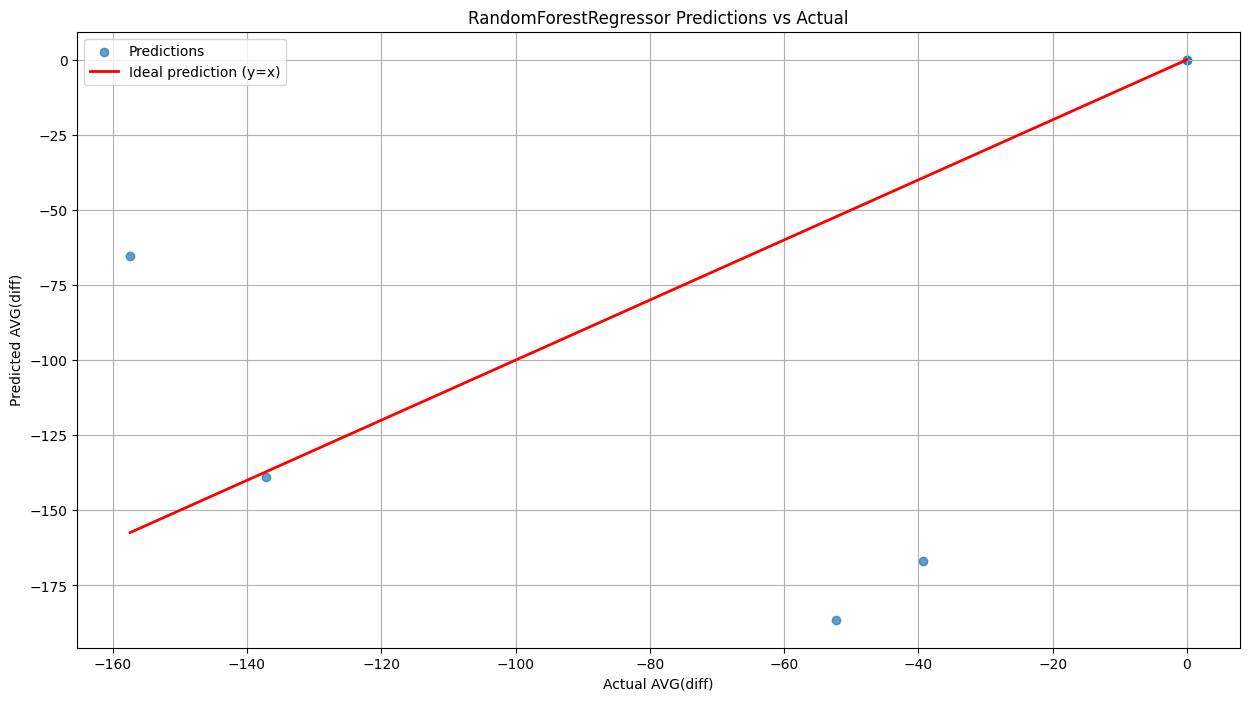

In [15]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(15, 8))
    plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             color='red', linewidth=2, label='Ideal prediction (y=x)')
    plt.xlabel('Actual AVG(diff)')
    plt.ylabel('Predicted AVG(diff)')
    plt.title(f'{name} Predictions vs Actual')
    plt.legend()
    plt.grid(True)
    plt.show()

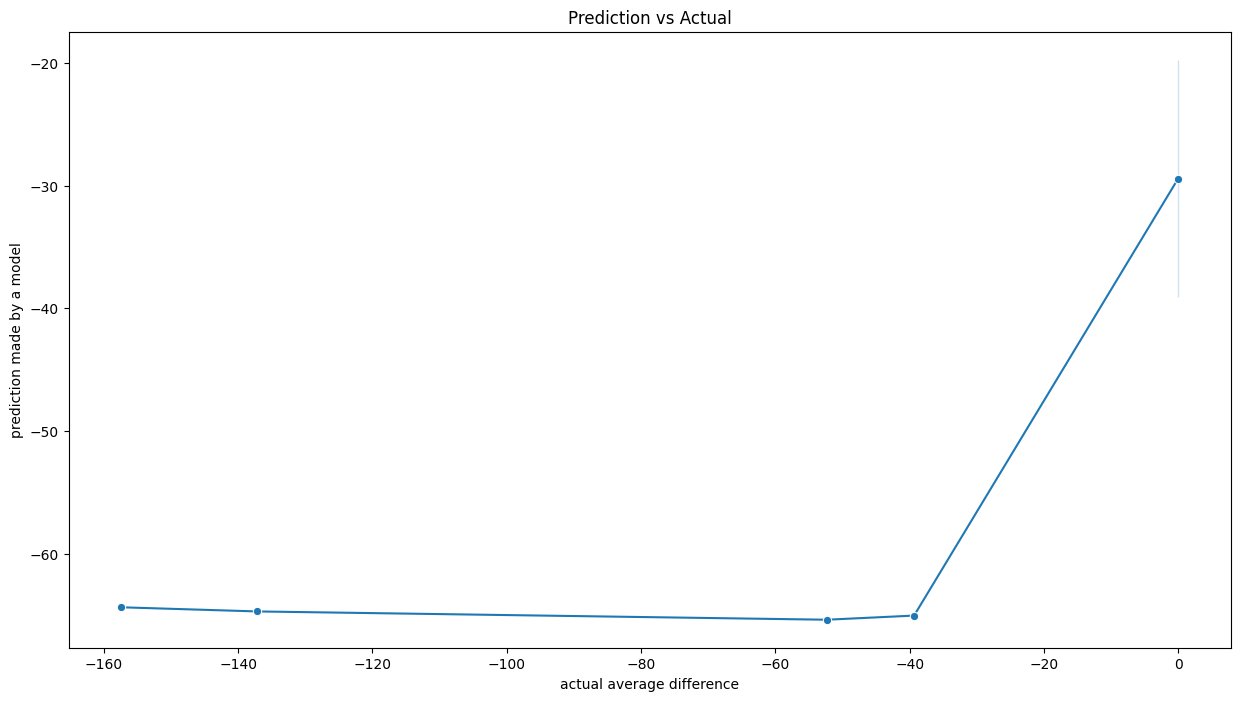

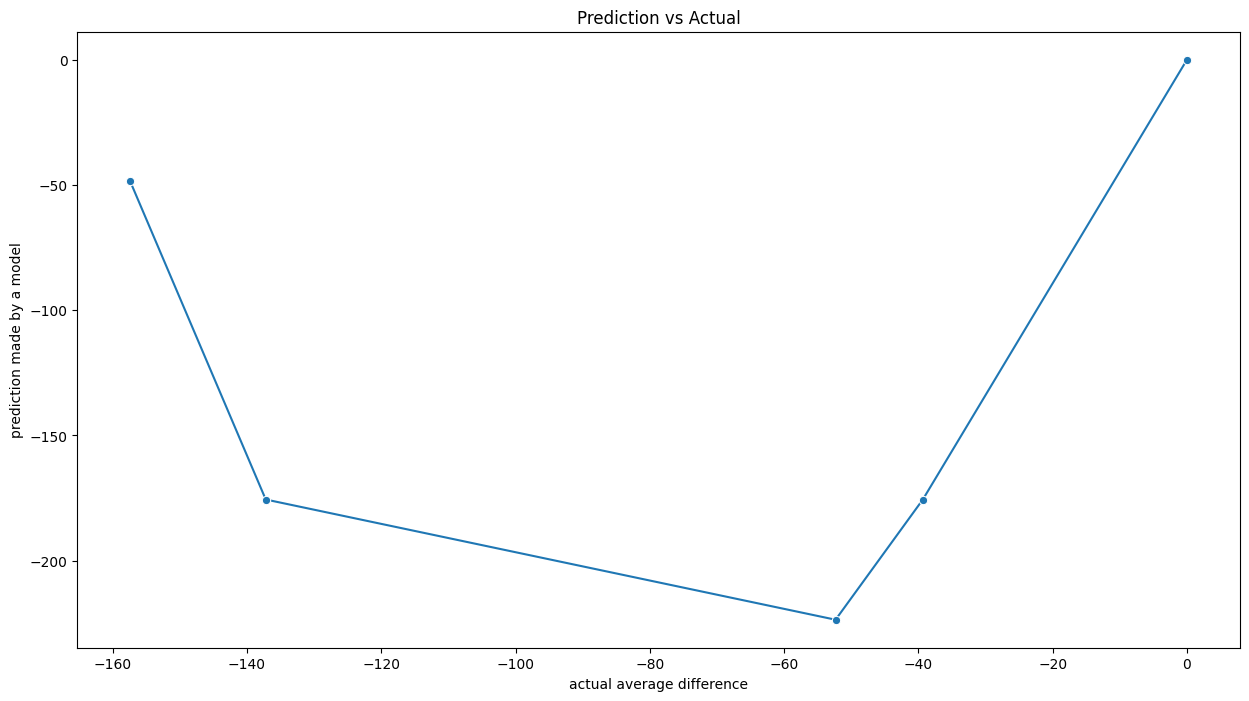

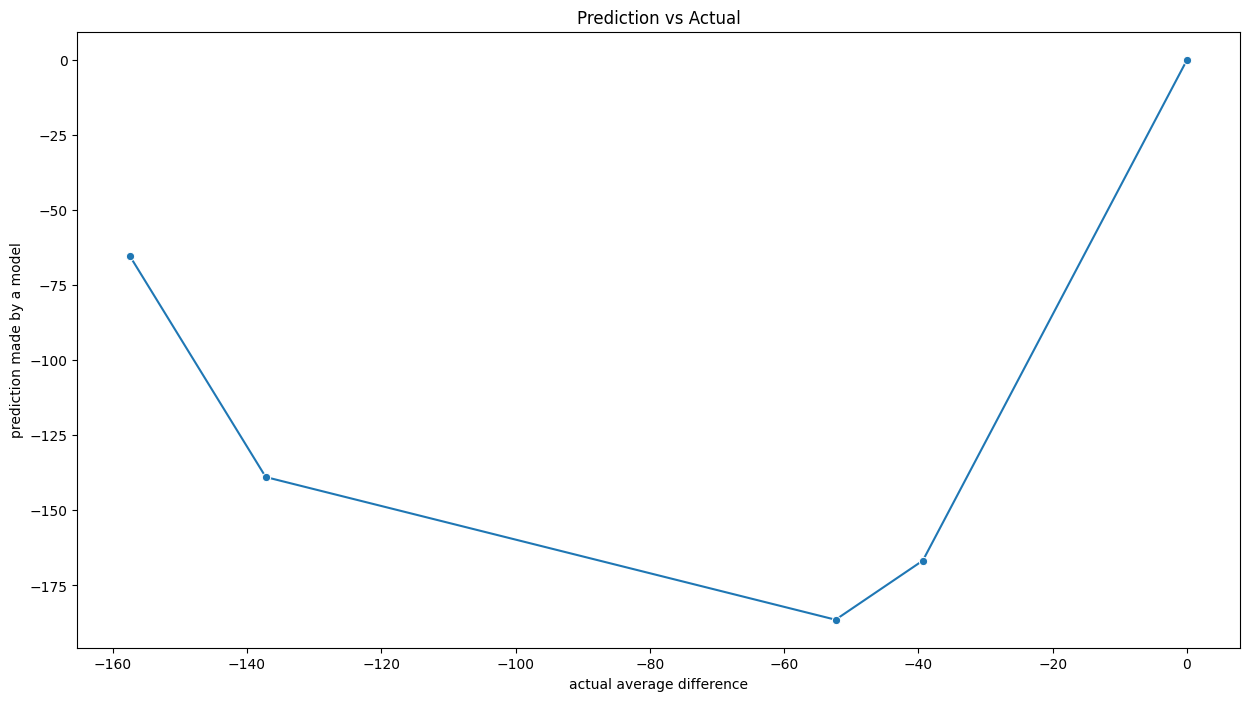

In [16]:
for name, model in models.items(): 
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    plt.figure(figsize=(15, 8))

    # Сортируем по y_test, чтобы линия была корректной
    sorted_idx = y_test.argsort()
    y_test_sorted = y_test.iloc[sorted_idx]
    predict_sorted = predict[sorted_idx]

    df_plot = pd.DataFrame({
        'Actual': y_test_sorted,
        'Predicted': predict_sorted
    })

    sns.lineplot(x='Actual', y='Predicted', data=df_plot, marker='o')
    plt.xlabel('actual average difference')
    plt.ylabel('prediction made by a model')
    plt.title('Prediction vs Actual')
    plt.show()

## Идеальный график линейной регрессии

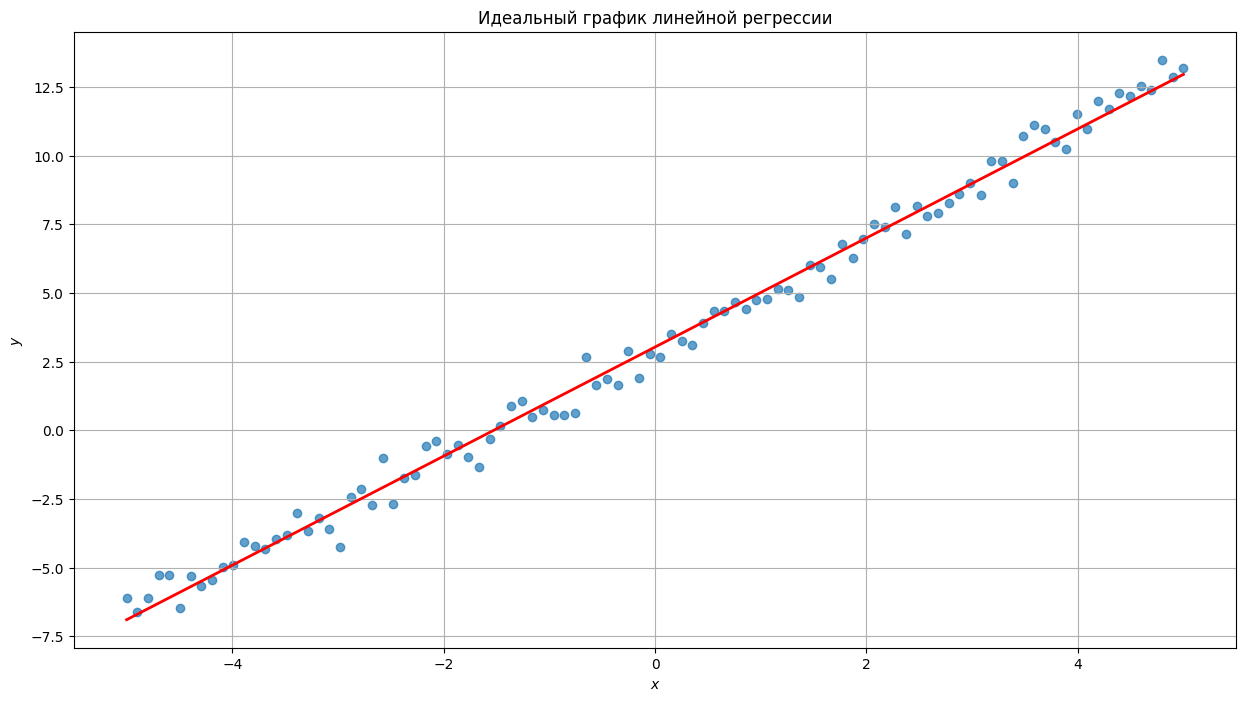

In [17]:
np.random.seed(0)
n = 100
x = np.linspace(-5, 5, n)
y = 2 * x + 3 + np.random.normal(scale=0.5, size=n)

# Обучение модели линейной регрессии
model = linear_model.LinearRegression().fit(x[:, None], y)

# Прогнозирование значений
yhat = model.predict(x[:, None])

# Построение графика
plt.figure(figsize=(15, 8))
plt.scatter(x, y, alpha=0.7)
plt.plot(x, yhat, color='red', linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Идеальный график линейной регрессии')
plt.grid(True)
plt.show()

## How would plot look like in the ideal case?
В идеальном случае все точки на графике будут располагаться точно на **диагональной линии** y = x, то есть предсказания полностью совпадают с реальными значениями.
- **Ответ: Диагональ.**